In [3]:
using Interpolations
using NPZ
using Plots
using PyPlot 
import PyPlot
using LaTeXStrings
using Statistics
using PyCall
using FFTW

In [12]:
include("fftUtils.jl")

Main.fftUtils

In [13]:
using .fftUtils

In [70]:
using Printf

In [113]:
A = npzread("/net/scratch3/giannis_kx/pixie3d/iter/iter3d/db_new/dt.scratch/b_hat_rho_mpi_correct_n0.npy");

In [5]:
rdim = size(A)[1];
ufdim = size(A)[2];
fidim = size(A)[3];
tdim = size(A)[4];
time_list = LinRange(1,tdim,tdim);
psin_list = LinRange(0,1.0,rdim);
uf_list = LinRange(0,2*pi,ufdim);
fi_list = LinRange(0,2*pi,fidim);

In [6]:
q = npzread("/net/scratch3/giannis_kx/pixie3d/iter/iter3d/db_new/dt.scratch/q_mpi_correct_n0.npy");

In [7]:
function q_prime(q,dpsi)
    L = length(q);
    qp = circshift(q,1);
    qm = circshift(q,-1);
    qprime = (qp-qm)/(2*dpsi);
    qprime[1] = (q[2]-q[1])/dpsi;
    qprime[end] = (q[end]-q[end-1])/dpsi
    return qprime
end

q_prime (generic function with 1 method)

In [8]:
bpert = A[:,:,:,110];

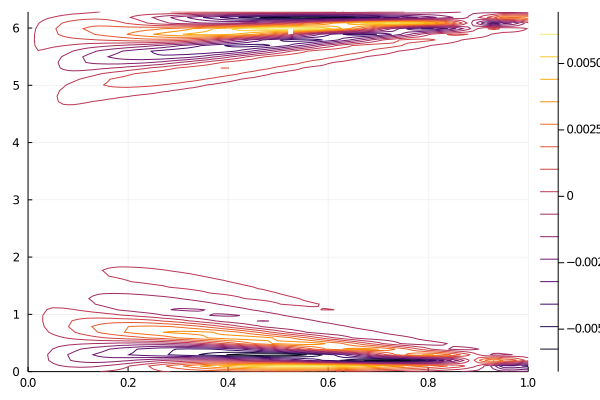

In [9]:
Plots.contour(psin_list,uf_list,bpert[:,:,1]',colorbar=:true)

In [10]:
bhat = fft(bpert,[2,3]);

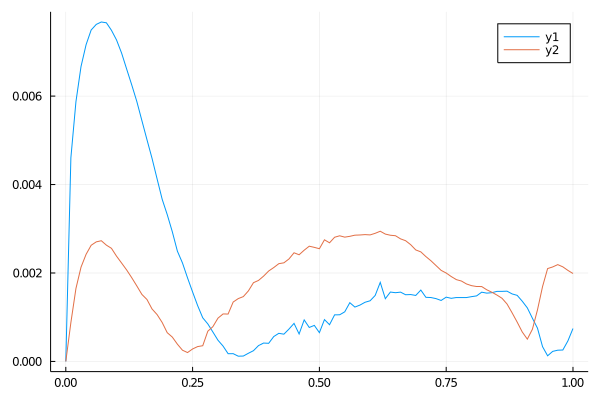

In [11]:
# make sure the fft works as intended
Plots.plot(psin_list,abs.(bhat[:,end,2]))
Plots.plot!(psin_list,abs.(bhat[:,4,1]))
#Plots.plot!(psin_list,imag(bhat[:,end-2,2]))
#Plots.plot!(psin_list,imag(bhat[:,end-2,3]))

In [14]:
qPrime = q_prime(q[:,109],1/100);

In [15]:
B = A[:,:,:,109];

In [16]:
C = fft(B,[2,3]);

In [18]:
maxbnm = [];
isl_width = [];
ms = [];
misl = [];
nisl = [];
ns = [];
Nm = size(C)[2];
Nn = size(C)[3];
for m in 1:size(C)[2]
    for n in 1:size(C)[3]
        max, maxInd = findmax(abs.(C[:,m,n]))
        append!(maxbnm,max)
        q_factor = (-1 ./q[maxInd,109].^3) .*qPrime[maxInd]
        append!(ns,n_mode_num(n,Nn))
        append!(ms,m_mode_num(m,Nm))
        if m !=1
            append!(nisl,n_mode_num(n,Nn))
            append!(misl,m_mode_num(m,Nm))
            wmn = sqrt((4*max)/abs(m_mode_num(m,Nm)*q_factor))
            append!(isl_width,wmn)
        end
    end
end

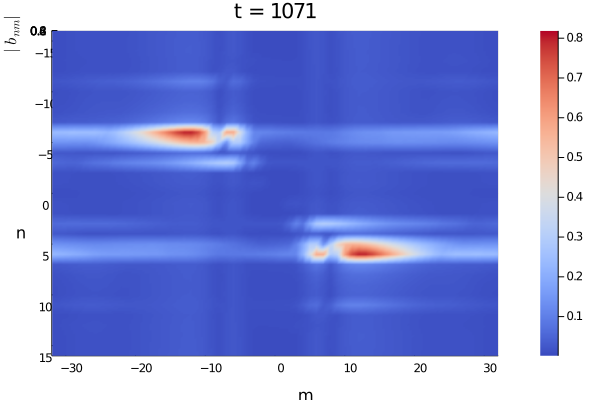

In [19]:
Plots.scatter(ns,ms,maxbnm,zlabel=L"|b_{nm}|",camera=(90,90),st=:surface,c=:coolwarm)
xlabel!("n")
ylabel!("m")
title!("t = 1071")

In [26]:
m_mode_num((Nm+1)/2,Nm)

-32.0

In [29]:
m_mode_num((Nm+1)/2+1,Nm)

32.0

In [27]:
Nm

65

In [33]:
m_grid = LinRange(m_mode_num((Nm+1)/2,Nm),m_mode_num((Nm+1)/2+1,Nm),Nm);
psi_grid = LinRange(0,1,size(C)[1]);

In [85]:
sC = fftshift(C,2);
rsC = reverse(sC,dims = 2);

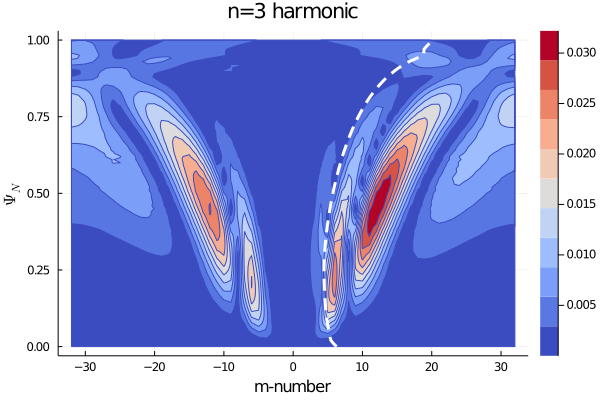

In [111]:
n_harmonic = 3
Plots.contourf(m_grid,psi_grid,abs.(rsC[:,:,n_harmonic]),levels=10,c=:coolwarm)
Plots.plot!(n_harmonic .*q[:,110],psi_grid,linestyle=:dash,linewidth=3.0,legend=false,c=:white)
title!(@sprintf("n=%s harmonic",n_harmonic))
xlabel!("m-number")
ylabel!(L"\Psi_N")

In [41]:
size(q)

(101, 200)

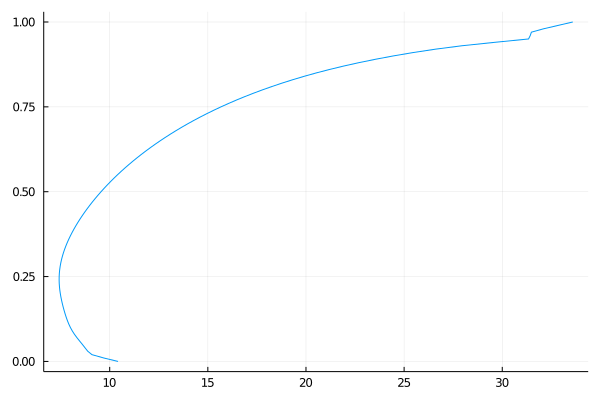

In [112]:
Plots.plot(5 .*q[:,1],psi_grid,legend=false)

In [65]:
M_decomp = deepcopy(C);

In [66]:
m_list = []
F = []
for m_ind in 1:size(M_decomp)[2]
    append!(m_list,m_mode_num(m_ind))
    append!(F,abs(M_decomp[80,m_ind,4]))
end

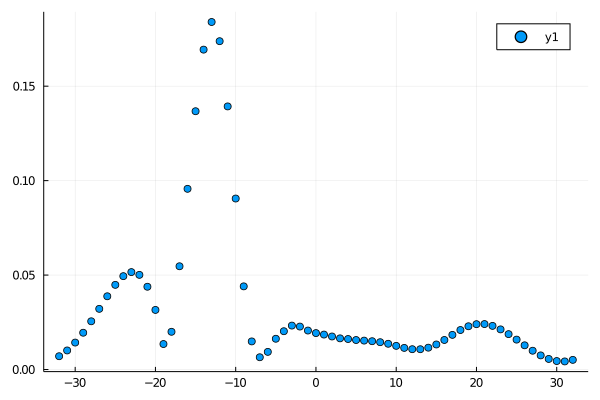

In [67]:
Plots.scatter(m_list,F);ik